In [4]:
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 15 18:03:06 2021

@author: Elice Project
"""

### 지하철 승하차 인원 분석

"""
● 프로젝트 목표
  - 승차 또는 하차 시 해당 시간, 해당 역의 승객 수를 확인하기 위해 개찰구 통과 승객 수 데이터와 지하철 위치좌표 데이터를 활용
  - 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습


● 프로젝트 목차
  1. 데이터 읽기: 승하차 인원 정보 데이터를 불러오고 DataFrame 구조를 확인
     1.1. 데이터 불러오기
     1.2. 데이터 확인하기

  2. 데이터 정제: 데이터 확인 후 형 변환 및 이상치 데이터 처리
     2.1. 2021년 6월 승하차 인원만 추출

  3. 데이터 시각화: 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악
     3.1. 호선 별 이용객 수 출력
     3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출
     3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력
     3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합
     3.5. 특정 호선의 혼잡 정도를 지도에 출력
     
● 데이터 출처
서울시 지하철 호선별 역별 승하차 인원 정보 데이터 :
http://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do

● 프로젝트 개요
코로나 시국에 익숙해졌다고는 하지만 가끔 밖으로 나갈 때 사람 많은 곳은 피하고 싶은 생각에
어떤 장소를 피해야 하는지 알아보고 싶을 때가 있을 겁니다. 지하철 이용 승객 수를 확인해보면
혼잡도가 높은 지역을 확인해볼 수 있을 것 같습니다.

이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 서울시 지하철 호선별 역별 승하차
인원 정보 데이터를 분석하고 지하철 역 위치 좌표 데이터를 활용해 특정 호선에서 어떤 역이
가장 혼잡한지 직관적으로 확인해봅시다.
"""

'\n● 프로젝트 목표\n  - 승차 또는 하차 시 해당 시간, 해당 역의 승객 수를 확인하기 위해 개찰구 통과 승객 수 데이터와 지하철 위치좌표 데이터를 활용\n  - 탐색적 데이터 분석을 수행하기 위한 데이터 정제, 특성 엔지니어링, 시각화 방법 학습\n\n\n● 프로젝트 목차\n  1. 데이터 읽기: 승하차 인원 정보 데이터를 불러오고 DataFrame 구조를 확인\n     1.1. 데이터 불러오기\n     1.2. 데이터 확인하기\n\n  2. 데이터 정제: 데이터 확인 후 형 변환 및 이상치 데이터 처리\n     2.1. 2021년 6월 승하차 인원만 추출\n\n  3. 데이터 시각화: 각 변수별로 추가적인 정제 또는 feature engineering 과정을 거치고 시각화를 총해 데이터 특성 파악\n     3.1. 호선 별 이용객 수 출력\n     3.2. 특정 호선에서 역별 평균 승하차 인원 데이터 추출\n     3.3. 평균 승하차 인원 수 내림차순으로 막대그래프 출력\n     3.4. 특정 호선의 혼잡 정도와 위치좌표 데이터 병합\n     3.5. 특정 호선의 혼잡 정도를 지도에 출력\n     \n● 데이터 출처\n서울시 지하철 호선별 역별 승하차 인원 정보 데이터 :\nhttp://data.seoul.go.kr/dataList/OA-12252/S/1/datasetView.do\n\n● 프로젝트 개요\n코로나 시국에 익숙해졌다고는 하지만 가끔 밖으로 나갈 때 사람 많은 곳은 피하고 싶은 생각에\n어떤 장소를 피해야 하는지 알아보고 싶을 때가 있을 겁니다. 지하철 이용 승객 수를 확인해보면\n혼잡도가 높은 지역을 확인해볼 수 있을 것 같습니다.\n\n이번 프로젝트에서는 서울 열린 데이터 광장에서 제공하는 서울시 지하철 호선별 역별 승하차\n인원 정보 데이터를 분석하고 지하철 역 위치 좌표 데이터를 활용해 특정 호선에서 어떤 역이\n가장 혼잡한지 직관적으로 확인해봅시다.\n'

In [5]:
### 1. 데이터 읽기

## 1.1 데이터 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

metro_df = pd.read_csv('./Metro Info.csv')   # Metro Info.csv 불러오기
metro_df.head()   # metro_df 상위 5개 자료
metro_df.info()   # metro_df 정보

## 1.2 데이터 확인하기

# metro_df 사용월 데이터 확인
metro_df_month = sorted(list(set(metro_df['사용월'])))
metro_df_month
# metro_df 호선명 데이터 확인
metro_df_line = sorted(list(set(metro_df['호선명'])))
metro_df_line
# metro_df 지하철역 데이터 확인
metro_df_station = sorted(list(set(metro_df['지하철역'])))
metro_df_station
# metro_df 데이터 개수 확인
df_count = len(list(set(metro_df['지하철역'])))
df_count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47768 entries, 0 to 47767
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           47768 non-null  int64 
 1   호선명           47768 non-null  object
 2   지하철역          47768 non-null  object
 3   04시-05시 승차인원  47768 non-null  int64 
 4   04시-05시 하차인원  47768 non-null  int64 
 5   05시-06시 승차인원  47768 non-null  int64 
 6   05시-06시 하차인원  47768 non-null  int64 
 7   06시-07시 승차인원  47768 non-null  int64 
 8   06시-07시 하차인원  47768 non-null  int64 
 9   07시-08시 승차인원  47768 non-null  int64 
 10  07시-08시 하차인원  47768 non-null  int64 
 11  08시-09시 승차인원  47768 non-null  int64 
 12  08시-09시 하차인원  47768 non-null  int64 
 13  09시-10시 승차인원  47768 non-null  int64 
 14  09시-10시 하차인원  47768 non-null  int64 
 15  10시-11시 승차인원  47768 non-null  int64 
 16  10시-11시 하차인원  47768 non-null  int64 
 17  11시-12시 승차인원  47768 non-null  int64 
 18  11시-12시 하차인원  47768 non-null  int64 
 19  12시-

580

In [6]:
### 2. 데이터 정제

""" 
가장 최근 한달간 수집된 데이터를 기준으로
특정 호선에서 어떤 역이 가장 혼잡한지 확인
"""

## 2.1 2021년 10월 승하차 인원 추출
metro_df_10 = metro_df[metro_df['사용월'] == 202110]
metro_df_recent = metro_df_10.drop(columns="작업일자")

In [7]:
### 3. 데이터 시각화

## 3.1 호선별 이용객 수 출력

# 한글 폰트 처리
plt.rc('font', family='Malgun Gothic')     # 윈도우, 구글 콜랩
plt.rcParams['axes.unicode_minus'] = False # 한글 폰트 처리 종료

In [8]:
# 호선별 Grouping
metro_line = metro_df_recent.groupby(['호선명']).mean().reset_index()
metro_line

,호선명,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,1호선,202110.0,348.600000,7.400000,5430.700000,3440.100000,6335.100000,15377.600000,13713.200000,34050.500000,...,3548.900000,3916.900000,21.300000,573.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.0
1,2호선,202110.0,249.680000,3.240000,8081.900000,2362.960000,14634.560000,13655.180000,37028.120000,32545.340000,...,4735.800000,10676.900000,5.680000,579.740000,0.200000,0.260000,0.240000,0.220000,0.0,0.0
2,3호선,202110.0,63.176471,3.176471,3831.147059,985.676471,8783.441176,9519.529412,22549.764706,20924.794118,...,1883.882353,5139.676471,1.911765,364.941176,0.117647,0.470588,0.029412,0.029412,0.0,0.0
3,4호선,202110.0,145.615385,5.692308,6806.538462,1184.884615,14564.615385,9341.384615,35626.346154,20352.307692,...,2529.615385,8621.461538,8.500000,468.230769,0.461538,0.423077,0.153846,0.115385,0.0,0.0
4,5호선,202110.0,19.928571,0.285714,4312.750000,876.821429,9392.107143,5720.428571,25912.464286,14196.339286,...,1370.410714,5288.660714,3.428571,442.696429,0.035714,0.125000,0.000000,0.000000,0.0,0.0
5,6호선,202110.0,49.153846,0.666667,3569.051282,797.128205,7047.000000,3739.564103,18891.307692,8209.230769,...,1615.666667,4765.051282,2.846154,352.230769,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,7호선,202110.0,43.529412,0.960784,6300.607843,1393.529412,12078.254902,6971.313725,30652.137255,15335.176471,...,2078.078431,6692.901961,13.745098,696.372549,0.000000,0.058824,0.019608,0.058824,0.0,0.0
7,8호선,202110.0,16.352941,0.352941,4802.764706,1400.117647,9284.705882,6027.882353,24062.529412,12787.470588,...,1321.882353,4837.058824,2.411765,402.294118,0.058824,0.000000,0.000000,0.000000,0.0,0.0
8,9호선,202110.0,23.360000,0.200000,3772.400000,928.720000,7557.960000,6273.720000,20717.760000,15881.840000,...,1537.120000,4953.080000,2.560000,158.760000,0.000000,0.000000,0.040000,0.040000,0.0,0.0
9,9호선2~3단계,202110.0,3.230769,0.076923,1608.615385,527.384615,4327.153846,4134.076923,11479.076923,8857.461538,...,876.000000,2787.923077,0.538462,87.230769,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [9]:
# 사용월 컬럼 삭제 및 호선명으로 인덱스 설정
metro_line = metro_line.drop(columns='사용월').set_index('호선명')
metro_line

,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
호선명,,,,,,,,,,,,,,,,,,,,,
1호선,348.600000,7.400000,5430.700000,3440.100000,6335.100000,15377.600000,13713.200000,34050.500000,20164.800000,81001.000000,...,3548.900000,3916.900000,21.300000,573.000000,0.000000,0.100000,0.000000,0.000000,0.0,0.0
2호선,249.680000,3.240000,8081.900000,2362.960000,14634.560000,13655.180000,37028.120000,32545.340000,52501.720000,82353.020000,...,4735.800000,10676.900000,5.680000,579.740000,0.200000,0.260000,0.240000,0.220000,0.0,0.0
3호선,63.176471,3.176471,3831.147059,985.676471,8783.441176,9519.529412,22549.764706,20924.794118,27464.970588,43434.617647,...,1883.882353,5139.676471,1.911765,364.941176,0.117647,0.470588,0.029412,0.029412,0.0,0.0
4호선,145.615385,5.692308,6806.538462,1184.884615,14564.615385,9341.384615,35626.346154,20352.307692,40138.769231,46365.192308,...,2529.615385,8621.461538,8.500000,468.230769,0.461538,0.423077,0.153846,0.115385,0.0,0.0
5호선,19.928571,0.285714,4312.750000,876.821429,9392.107143,5720.428571,25912.464286,14196.339286,30055.267857,33281.142857,...,1370.410714,5288.660714,3.428571,442.696429,0.035714,0.125000,0.000000,0.000000,0.0,0.0
6호선,49.153846,0.666667,3569.051282,797.128205,7047.000000,3739.564103,18891.307692,8209.230769,22810.871795,19785.256410,...,1615.666667,4765.051282,2.846154,352.230769,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7호선,43.529412,0.960784,6300.607843,1393.529412,12078.254902,6971.313725,30652.137255,15335.176471,36636.274510,37622.196078,...,2078.078431,6692.901961,13.745098,696.372549,0.000000,0.058824,0.019608,0.058824,0.0,0.0
8호선,16.352941,0.352941,4802.764706,1400.117647,9284.705882,6027.882353,24062.529412,12787.470588,31228.941176,29726.000000,...,1321.882353,4837.058824,2.411765,402.294118,0.058824,0.000000,0.000000,0.000000,0.0,0.0
9호선,23.360000,0.200000,3772.400000,928.720000,7557.960000,6273.720000,20717.760000,15881.840000,24526.520000,31698.240000,...,1537.120000,4953.080000,2.560000,158.760000,0.000000,0.000000,0.040000,0.040000,0.0,0.0


In [10]:
# 호선별 평균 이용객 수를 내림차순으로 정렬
metro_line = metro_line.mean(axis=1).sort_values(ascending=False)
metro_line

호선명
2호선         27857.182917
1호선         23309.600000
4호선         19469.068109
3호선         15773.697917
경인선         15080.391667
7호선         13926.219363
과천선         12867.398438
경부선         12250.956731
5호선         11687.156250
8호선         11349.101716
9호선         11340.357500
분당선         11106.294643
일산선         10384.477273
안산선         10127.668269
6호선          8780.167735
9호선2~3단계     7463.472756
경원선          7240.921528
공항철도 1호선     7156.287202
중앙선          4850.140873
경의선          4000.562500
우이신설선        3688.785256
수인선          3657.377315
경강선          2969.865530
경춘선          2388.200658
장항선          2316.336310
dtype: float64

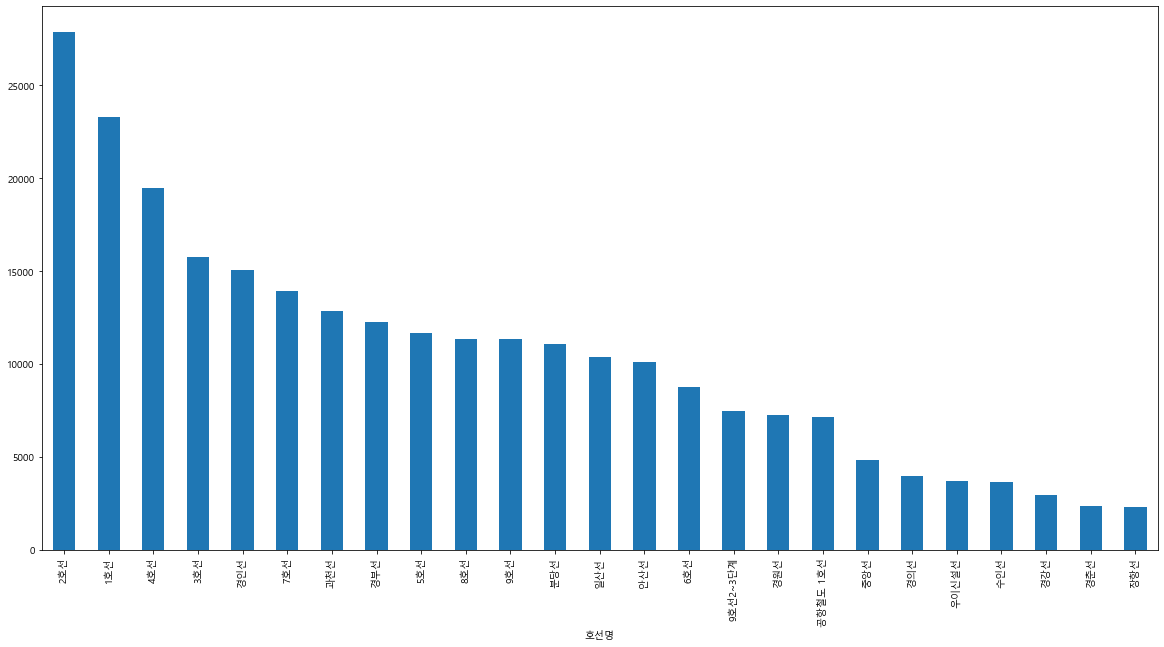

In [11]:
# 시각화
plt.figure(figsize=(20,10))
metro_line.plot(kind=('bar'))
plt.show()

In [12]:
## 3.2 특정 호선에서 역별 평균 승하차 인원 데이터 추출

line = '2호선'
# 호선별, 역별 Grouping
metro_st = metro_df_recent.groupby(['호선명', '지하철역']).mean().reset_index()
metro_st
# 2호선 데이터만 추출
metro_st_line2 = metro_st[metro_st['호선명'] == line]
metro_st_line2

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
10,2호선,강남,202110,89,5,5125,9758,14523,45493,32513,...,21448,12363,6,46,2,0,0,0,0,0
11,2호선,강변(동서울터미널),202110,23,0,7746,2187,23537,22023,65321,...,4888,12438,5,126,0,0,0,0,0,0
12,2호선,건대입구,202110,237,5,12995,1962,18624,18455,45999,...,9508,19218,18,1798,0,0,0,0,0,0
13,2호선,교대(법원.검찰청),202110,11,0,2211,6436,10940,22802,20931,...,6395,7059,5,55,0,0,0,0,0,0
14,2호선,구로디지털단지,202110,326,4,38551,5406,47808,19574,117330,...,5971,32217,2,111,0,0,1,1,0,0
15,2호선,구의(광진구청),202110,47,0,12764,952,23109,9692,58172,...,3831,14173,3,726,1,0,0,0,0,0
16,2호선,낙성대(강감찬),202110,18,0,10555,1764,23433,8118,67966,...,4020,19502,3,865,0,0,0,0,0,0
17,2호선,당산,202110,50,3,6154,2856,14736,11570,38885,...,3438,11227,3,259,0,0,0,1,0,0
18,2호선,대림(구로구청),202110,621,8,33020,3692,27881,10740,58086,...,2486,14934,1,375,0,0,0,0,0,0
19,2호선,도림천,202110,2,0,275,353,1027,749,2912,...,154,702,2,34,0,0,0,0,0,0


In [13]:
# 승차 인원 컬럼 추출 반복문
metro_in = pd.DataFrame()
metro_in['지하철역'] = metro_st_line2['지하철역']
metro_in
for col in range(int((len(metro_df_recent.columns)-3)/2)):
    metro_in[metro_st_line2.columns[3+2*col]] = metro_st_line2[metro_st_line2.columns[3+2*col]]
# 지하철역으로 인덱스 설정
metro_in = metro_in.set_index('지하철역')
metro_in

,04시-05시 승차인원,05시-06시 승차인원,06시-07시 승차인원,07시-08시 승차인원,08시-09시 승차인원,09시-10시 승차인원,10시-11시 승차인원,11시-12시 승차인원,12시-13시 승차인원,13시-14시 승차인원,...,18시-19시 승차인원,19시-20시 승차인원,20시-21시 승차인원,21시-22시 승차인원,22시-23시 승차인원,23시-24시 승차인원,00시-01시 승차인원,01시-02시 승차인원,02시-03시 승차인원,03시-04시 승차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,89,5125,14523,32513,54049,44482,46013,62679,80758,92777,...,292903,179304,140951,180551,180883,21448,6,2,0,0
강변(동서울터미널),23,7746,23537,65321,93589,69671,52378,49418,48656,47126,...,55175,41769,33582,29157,19727,4888,5,0,0,0
건대입구,237,12995,18624,45999,78200,54828,33742,33812,38514,41733,...,79758,57603,57254,75600,75971,9508,18,0,0,0
교대(법원.검찰청),11,2211,10940,20931,29726,24989,24905,30459,33686,40616,...,126073,58363,44968,51562,46853,6395,5,0,0,0
구로디지털단지,326,38551,47808,117330,159072,102069,61106,57013,62115,62139,...,193221,91391,51633,46774,40222,5971,2,0,1,0
구의(광진구청),47,12764,23109,58172,97568,58720,32738,28880,29580,28370,...,40162,19329,14994,15511,14510,3831,3,1,0,0
낙성대(강감찬),18,10555,23433,67966,109393,70237,40750,36948,39180,38653,...,44623,24257,18555,18646,15381,4020,3,0,0,0
당산,50,6154,14736,38885,47586,30459,21618,21554,22814,23023,...,52258,23724,17607,19545,18338,3438,3,0,0,0
대림(구로구청),621,33020,27881,58086,82041,56236,33380,29960,31715,30989,...,47880,23565,16319,13415,10792,2486,1,0,0,0


In [14]:
# 하차 인원 컬럼 추출 반복문
metro_out = pd.DataFrame()
metro_out['지하철역'] = metro_st_line2['지하철역']
metro_out
for col in range(int((len(metro_df_recent.columns)-3)/2)):
    metro_out[metro_st_line2.columns[4+2*col]] = metro_st_line2[metro_st_line2.columns[4+2*col]]
# 지하철역으로 인덱스 설정
metro_out = metro_out.set_index('지하철역')
metro_out

,04시-05시 하차인원,05시-06시 하차인원,06시-07시 하차인원,07시-08시 하차인원,08시-09시 하차인원,09시-10시 하차인원,10시-11시 하차인원,11시-12시 하차인원,12시-13시 하차인원,13시-14시 하차인원,...,18시-19시 하차인원,19시-20시 하차인원,20시-21시 하차인원,21시-22시 하차인원,22시-23시 하차인원,23시-24시 하차인원,00시-01시 하차인원,01시-02시 하차인원,02시-03시 하차인원,03시-04시 하차인원
지하철역,,,,,,,,,,,,,,,,,,,,,
강남,5,9758,45493,123346,267187,277601,134828,101246,102393,120246,...,160100,85714,40874,33806,34085,12363,46,0,0,0
강변(동서울터미널),0,2187,22023,25660,44037,37052,35429,34239,37080,40802,...,98811,69983,45953,38437,43161,12438,126,0,0,0
건대입구,5,1962,18455,23023,53985,43066,36912,42182,51311,57727,...,133536,84697,47232,43625,46380,19218,1798,0,0,0
교대(법원.검찰청),0,6436,22802,49504,133189,127549,62823,51089,47953,51569,...,60635,35035,20067,17550,20542,7059,55,0,0,0
구로디지털단지,4,5406,19574,73916,217767,126238,52173,43353,44442,51691,...,147501,112811,71937,72967,80294,32217,111,0,1,0
구의(광진구청),0,952,9692,14821,36289,21733,19126,18924,21755,23987,...,82084,58921,38006,37010,40139,14173,726,0,0,0
낙성대(강감찬),0,1764,8118,16722,34693,28648,24497,22257,25850,27766,...,87106,75433,49226,47346,57337,19502,865,0,0,0
당산,3,2856,11570,26052,64964,32881,18737,18028,20540,21673,...,65318,42797,27888,26789,29914,11227,259,0,1,0
대림(구로구청),8,3692,10740,20718,51605,31862,27958,28543,28598,29721,...,64342,47317,33659,42004,43878,14934,375,0,0,0


In [15]:
# 역별 평균 승하차 인원 추출
df = pd.DataFrame(index = metro_st_line2['지하철역'])
df
df['평균 승차 인원'] = metro_in.mean(axis=1).astype(int)
df['평균 하차 인원'] = metro_out.mean(axis=1).astype(int)
df

,평균 승차 인원,평균 하차 인원
지하철역,,
강남,83922,82258
강변(동서울터미널),34444,33757
건대입구,38888,41420
교대(법원.검찰청),33165,37533
구로디지털단지,59904,59908
구의(광진구청),24699,24375
낙성대(강감찬),29717,28646
당산,19546,22436
대림(구로구청),26245,27051


In [16]:
## 3.3 평균 승하차 인원 막대그래프(내림차순)

# 승차 인원 상위 10개역
top10_in = df.sort_values(by='평균 승차 인원', ascending = False).head(10)
top10_in

,평균 승차 인원,평균 하차 인원
지하철역,,
강남,83922,82258
잠실(송파구청),76074,74423
신림,68536,66531
홍대입구,61704,64105
구로디지털단지,59904,59908
선릉,52796,46931
신도림,52638,52087
서울대입구(관악구청),51661,50737
삼성(무역센터),50041,50666


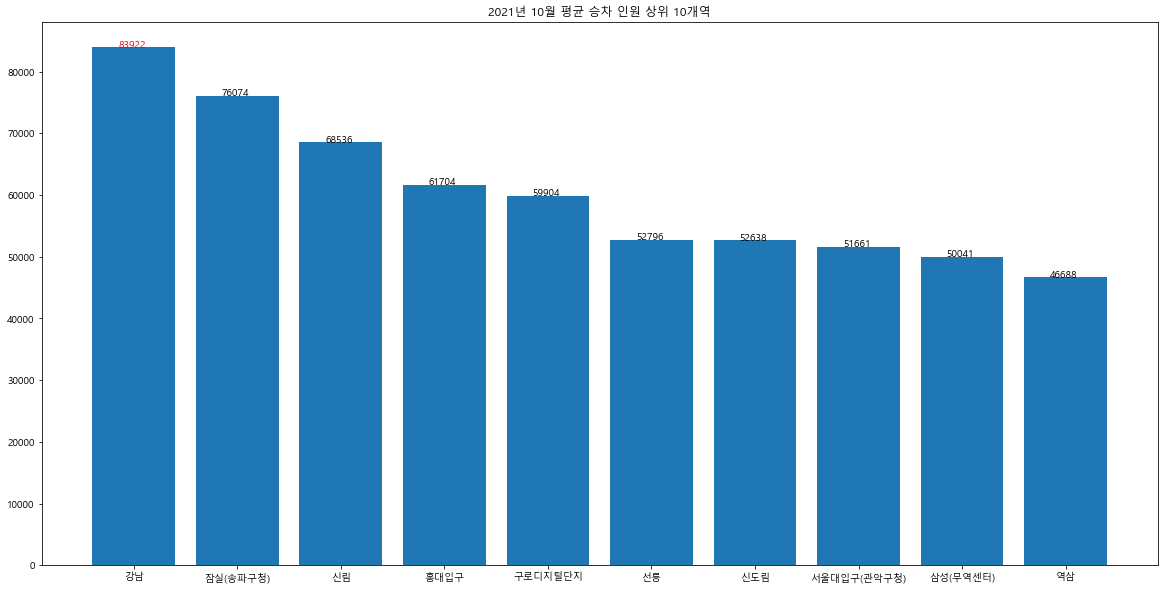

In [17]:
# 시각화
plt.figure(figsize=(20,10))
plt.bar(top10_in.index, top10_in['평균 승차 인원'])
for x, y in enumerate(list(top10_in['평균 승차 인원'])):
    if x == 0 :
        plt.annotate(y, (x - 0.15, y), color = 'red')
    else :
        plt.annotate(y, (x - 0.15, y))
plt.title('2021년 10월 평균 승차 인원 상위 10개역')
plt.show()

In [18]:
# 하차 인원 상위 10개역
top10_out = df.sort_values(by='평균 하차 인원', ascending = False).head(10)
top10_out

,평균 승차 인원,평균 하차 인원
지하철역,,
강남,83922,82258
잠실(송파구청),76074,74423
신림,68536,66531
홍대입구,61704,64105
구로디지털단지,59904,59908
신도림,52638,52087
역삼,46688,51754
서울대입구(관악구청),51661,50737
삼성(무역센터),50041,50666


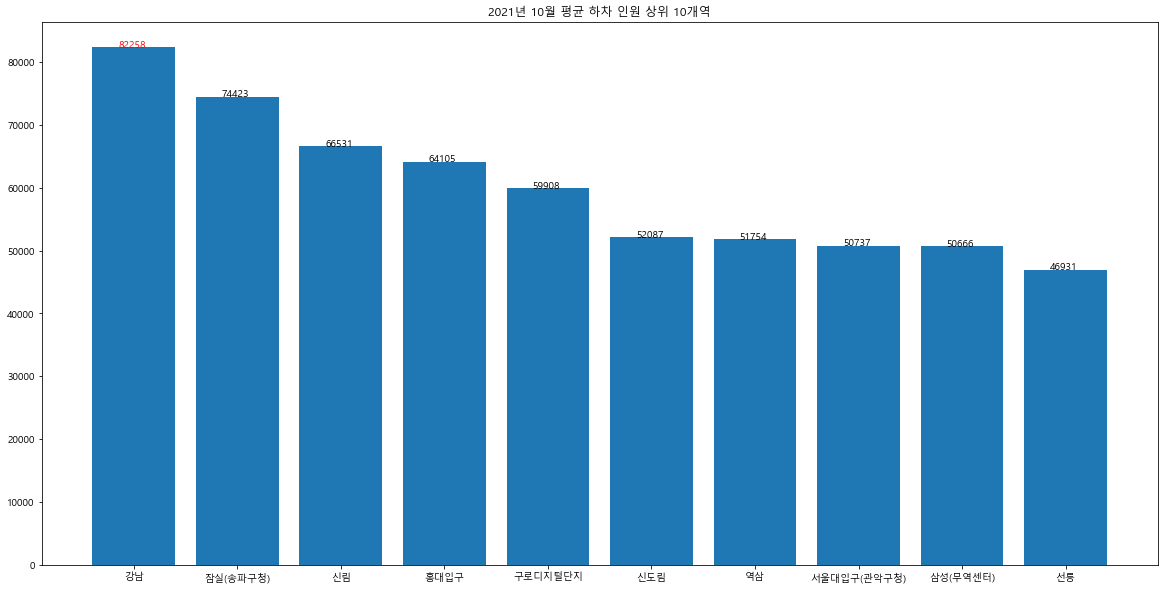

In [19]:
# 시각화
plt.figure(figsize=(20,10))
plt.bar(top10_out.index, top10_out['평균 하차 인원'])
for x, y in enumerate(list(top10_out['평균 하차 인원'])):
    if x == 0 :
        plt.annotate(y, (x - 0.15, y), color = 'red')
    else :
        plt.annotate(y, (x - 0.15, y))
plt.title('2021년 10월 평균 하차 인원 상위 10개역')
plt.show()

In [20]:
## Ex 1. 6호선에서 가장 많은 승차 인원이 이용하는 역

line6 = '6호선'
# 호선별, 역별 Grouping
metro_st6 = metro_df_recent.groupby(['호선명', '지하철역']).mean().reset_index()
metro_st6
# 6호선 데이터만 추출
metro_st_line6 = metro_st[metro_st['호선명'] == line6]
metro_st_line6

,호선명,지하철역,사용월,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,...,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
176,6호선,고려대(종암),202110,34,0,3558,762,6832,3338,17699,...,1434,6034,3,102,0,0,0,0,0,0
177,6호선,공덕,202110,75,2,4759,1605,7207,9123,18129,...,3215,5257,11,1280,0,0,0,0,0,0
178,6호선,광흥창(서강),202110,6,0,2521,1235,6229,4222,16133,...,1616,3833,0,77,0,0,0,0,0,0
179,6호선,구산,202110,4,0,4831,166,9954,2223,25797,...,607,3695,0,250,0,0,0,0,0,0
180,6호선,녹사평(용산구청),202110,12,0,876,468,1869,3519,4220,...,2409,1781,4,106,0,0,0,0,0,0
181,6호선,대흥(서강대앞),202110,23,0,2118,609,4466,3510,13374,...,2034,3891,2,130,0,0,0,0,0,0
182,6호선,독바위,202110,1,0,1953,184,4266,934,11724,...,201,2885,0,192,0,0,0,0,0,0
183,6호선,돌곶이,202110,19,1,6143,810,12774,2899,32678,...,1232,6090,2,365,0,0,0,0,0,0
184,6호선,동묘앞,202110,236,1,4329,662,4199,4423,7504,...,1223,6543,3,771,0,0,0,0,0,0
185,6호선,디지털미디어시티,202110,120,7,5616,3131,11624,11591,36862,...,1438,6171,33,923,0,0,0,0,0,0


In [33]:
# 승차 인원 컬럼 추출 반복문
metro_in6 = pd.DataFrame()
metro_in6['지하철역'] = metro_st_line6['지하철역']
metro_in6
for col in range(int((len(metro_df_recent.columns)-3)/2)):
    metro_in6[metro_st_line6.columns[3+2*col]] = metro_st_line6[metro_st_line6.columns[3+2*col]]
# 지하철역으로 인덱스 설정
metro_in6 = metro_in6.set_index('지하철역')
metro_in6
# 역별 평균 승차 인원 추출
df6 = pd.DataFrame(index = metro_st_line6['지하철역'])
df6
df6['평균 승차 인원'] = metro_in6.mean(axis=1).astype(int)
print(df6.sort_values(by='평균 승차 인원', ascending = False).head(10))

             평균 승차 인원
지하철역                 
응암              18997
공덕              18313
망원              15928
마포구청            15052
합정              14844
새절(신사)          13744
디지털미디어시티        13580
이태원             13370
석계              13160
화랑대(서울여대입구)     12139


In [22]:
## 3.4 특정 호선의 혼잡 정도와 위치/좌표 데이터 병합

# 카카오 API를 이용한 csv 파일 불러오기
metro_location = pd.read_csv('./Metro_Coordinates.csv')
metro_location.head()
# 특정 호선의 역별 평균 승하차 인원 수와 지하철역 위치/좌표를 데이터프레임으로 반환하는 함수 작성
def get_line_and_location(line, metro_st):
    # 특정 호선의 데이터 추출
    metro_line_n = metro_st[metro_st['호선명'] == line]
    
    # 승차 인원 컬럼 추출
    metro_in = pd.DataFrame()
    metro_in['지하철역'] = metro_line_n['지하철역']
    for i in range(int((len(metro_df_recent.columns)-3)/2)):
        metro_in[metro_line_n.columns[3+2*i]] = metro_line_n[metro_line_n.columns[3+2*i]]
    metro_in = metro_in.set_index('지하철역')
    # 하차 인원 컬럼 추출
    metro_out = pd.DataFrame()
    metro_out['지하철역'] = metro_line_n['지하철역']
    for i in range(int((len(metro_df_recent.columns)-3)/2)):
        metro_out[metro_line_n.columns[4+2*i]] = metro_line_n[metro_line_n.columns[4+2*i]]
    metro_out = metro_out.set_index('지하철역')
    
    # 역별 평균 승하차 인원 추출
    df = pd.DataFrame(index = metro_line_n['지하철역'])
    df['평균 승차 인원'] = metro_in.mean(axis=1).astype(int)
    df['평균 하차 인원'] = metro_out.mean(axis=1).astype(int)
    
    # 지하철역 이름 통일
    temp = []
    df = df.reset_index()
    for name in df['지하철역']:
        temp.append(name.split('(')[0]+'역')
    df['지하철역'] = temp
    
    # 지하철역 이름을 기준으로 데이터프레임 병합
    df = df.merge(metro_location, left_on='지하철역', right_on='지하철역')
    return df

get_line_and_location('6호선', metro_st)

,지하철역,평균 승차 인원,평균 하차 인원,주소,x좌표,y좌표
0,고려대역,8219,7919,서울 성북구 종암동 29-18,37.589679,127.035926
1,고려대역,8219,7919,서울 성북구 종암동 29-18,37.589679,127.035926
2,공덕역,18313,17574,서울 마포구 공덕동 423-29,37.544487,126.951195
3,광흥창역,9134,8793,서울 마포구 창전동 145-17,37.547426,126.932477
4,광흥창역,9134,8793,서울 마포구 창전동 145-17,37.547426,126.932477
5,구산역,8368,6321,서울 은평구 구산동 1,37.611212,126.917182
6,녹사평역,5980,5903,서울 용산구 용산동4가 4,37.534446,126.985525
7,대흥역,8434,8625,서울 마포구 대흥동 128-1,37.547730,126.942379
8,대흥역,8434,8625,서울 마포구 대흥동 128-1,37.547730,126.942379
9,독바위역,3039,3313,서울 은평구 불광동 13-33,37.618377,126.932857


In [23]:
## 3.5 특정 호선의 혼잡 정도를 지도에 출력

import folium as fl
# 특정 위도/경도를 중심으로 하는 Open Street Map 출력
map_osm = fl.Map(location = [37.529622, 126.984307], zoom_start = 12)
print(map_osm)

In [34]:
# 특정 호선의 역별 평균 승하차 인원 수와 위치/좌표 데이터 추출
rail6 = '6호선'
df = get_line_and_location(rail6, metro_st)

In [35]:
# 서울 중심인 명동역의 위도/경도를 중심으로 지도 출력
latitude = metro_location[metro_location['지하철역'] == '명동역']['x좌표']
longitude = metro_location[metro_location['지하철역'] == '명동역']['y좌표']
map_osm = fl.Map(location = [latitude, longitude], zoom_start = 12)

# 각 지하철역 위치별로 지도에 원형마커 추가
for c in df.index:
    marker = fl.CircleMarker([df['x좌표'][c], df['y좌표'][c]],
                            radius = (df['평균 승차 인원'][c] + 1) / 3000,   # 인원 수가 0일 경우 오류 처리
                            popup = [df['지하철역'][c], df['평균 승차 인원'][c]],
                            color = 'blue',
                            fill_color = 'blue')
    marker.add_to(map_osm)

map_osm

In [36]:
## EX 2. 강남역의 x좌표(위도) 출력

rail2 = '2호선'
df = get_line_and_location(rail2, metro_st)

In [37]:
# 강남역의 위도/경도를 중심으로 지도 출력
latitude = metro_location[metro_location['지하철역'] == '강남역']['x좌표']
longitude = metro_location[metro_location['지하철역'] == '강남역']['y좌표']
map_osm2 = fl.Map(location = [latitude, longitude], zoom_start = 12)

# 각 지하철역 위치별로 지도에 원형마커 추가
for c in df.index:
    marker = fl.CircleMarker([df['x좌표'][c], df['y좌표'][c]],
                            radius = (df['평균 승차 인원'][c] + 1) / 3000,   # 인원 수가 0일 경우 오류 처리
                            popup = [df['지하철역'][c], df['평균 승차 인원'][c]],
                            color = 'red',
                            fill_color = 'red')
    marker.add_to(map_osm2)

map_osm2

In [38]:
print(df[df['지하철역'] == '강남역']['x좌표'])

0    37.497057
Name: x좌표, dtype: float64


#### get_line_and_location 함수와

for c in df.index:
    marker = fl.CircleMarker([df['x좌표'][c], df['y좌표'][c]],
                            radius = (df['평균 승차 인원'][c] + 1) / 3000,   # 인원 수가 0일 경우 오류 처리
                            popup = [df['지하철역'][c], df['평균 승차 인원'][c]],
                            color = 'red',
                            fill_color = 'red')
    marker.add_to(map_osm2)

#### 코드를 통해 해당 프로젝트 목표 데이터 출력